# 2. Modelos de distribución multivariados

<p align="right">
Autor: Emmanuel Alcalá
<br>
<a href="https://scholar.google.com.mx/citations?hl=en&user=3URusCgAAAAJ&view_op=list_works&sortby=pubdate">Google Scholar</a>
</p>

<p align="left">
<br>
<a href="https://jealcalat.github.io/Analisis_multivariado/">Regresar a la página del curso</a>
</p>

---


In [23]:
# cargar algunas funciones que se utilizarán para simular y graficar
source("../r_scripts/utilities.r")

## 2.2. Distribución multinormal

Ya vimos que para la distribución normal univariada, la función de densidad está dada por

$$
  p(x) = \frac{1}{\sigma \sqrt{2\pi}} e\left\{\frac{-(x-\mu)^2}{2\sigma^2}\right\}  \tag{8}
$$

Cuando $\mu = 0, \sigma = 1$, la ecuación (8) es una distribución especial llamada _distribución normal estándar_. La distribución normal estándar $\mathcal{N}(0, 1)$ tiene ciertas propiedades interesantes:

1. En el intervalo $\left[\mu - \sigma, \mu + \sigma \right]$ se cubre el 0.683 del área total, es decir, $p(\mu - \sigma \leq X \leq \mu + \sigma) \approx 0.68$.
2. En el intervalo $\left[\mu - 2\sigma, \mu + 2\sigma \right]$ se cubre el .954 del área total.
3. El área en $X \leq \mu - \sigma$ es $1 - p(X > \mu - \sigma)$


In [24]:
# dado que la distribución es simétrica, p(mu - sigma <= X <= mu+sigma)
# la región mu-sigma es igual que mu+sigma, por lo tanto, es suficiente
# con restarle a 1 la probabilidad p(mu-sigma <= X) * 2
(1 - (pnorm(-1, mean = 0, sd = 1)) * 2) |> round(3)
(1 - (pnorm(-2, mean = 0, sd = 1)) * 2) |> round(3)
# con 3 sigma cubre el 99 % del espacio
(1 - (pnorm(-3, mean = 0, sd = 1)) * 2) |> round(3)
# la probabilidad de x <= mu-sigma es
1 - (pnorm(1, mean = 0, sd = 1)) |> round(3)
# o equivalentemente
(pnorm(-1, 0, 1)) |> round(3)


[1] 0.683

[1] 0.954

[1] 0.997

[1] 0.159

[1] 0.159

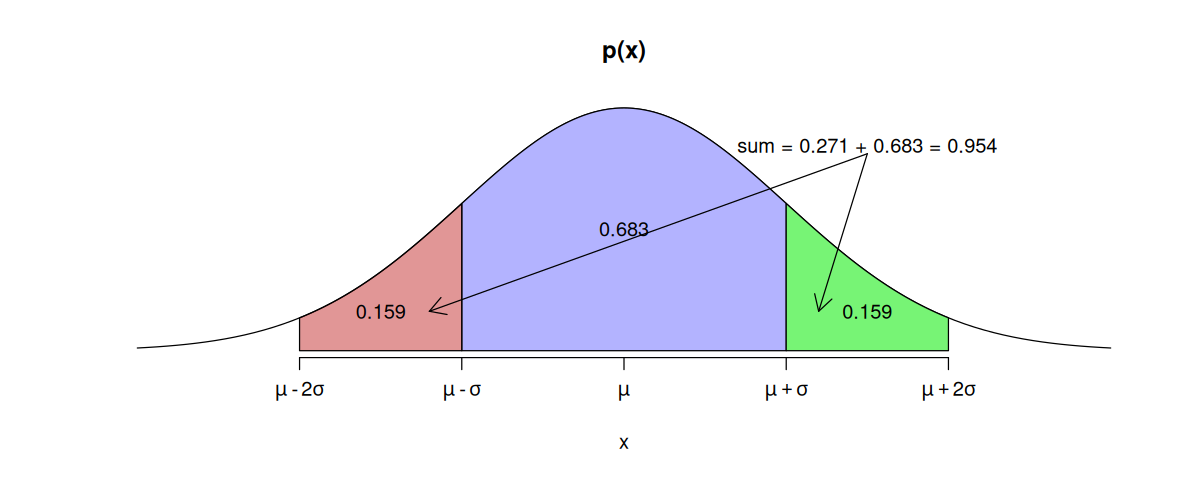

In [25]:
# fijar tamaño de gráficos
options(repr.plot.width = 10, repr.plot.height = 4)
# graficar normal estándar
# colores
red_light <- "#be1b1b75"
blue_light <- "#B3B3FF"
green_light <- "#77f475"
curve(dnorm(x, 0, 1),
  from = -3, to = 3,
  axes = FALSE,
  ylab = "",
  main = "p(x)",
  panel.first = {
    axis(1,
      at = c(-2:2),
      labels = parse(text = c("mu-2*sigma", "mu-sigma", "mu", "mu+sigma", "mu+2*sigma"))
    )
  }
)
# función cargada en utilities.R
# graficar area de x entre [mu-sigma, mu+sigma]
plot_area_normal(
  from_x = -1,
  to_x = 1,
  fill = blue_light
)
# graficar área de mu-2sigma <= x <= mu-sigma
plot_area_normal(
  from_x = -2,
  to_x = -1,
  fill = red_light
)
plot_area_normal(
  from_x = 1,
  to_x = 2,
  fill = green_light
)
# anotación de proporción de la curva
x_lab_pos <- c(-3 / 2, 0, 3 / 2) # posición en x
y_lab_pos <- dnorm(x_lab_pos, 0, 1) / 2 # posición en y
text(
  x = x_lab_pos,
  y = y_lab_pos,
  # a la izquierda de la zona azul es
  labels = c(
    (pnorm(-1, 0, 1)) |> round(3),
    (1 - (pnorm(-1, mean = 0, sd = 1)) * 2) |> round(3),
    (pnorm(-1, 0, 1)) |> round(3)
  )
)
arrows(
  x0 = c(x_lab_pos[1] * 0.8, x_lab_pos[3] * 0.8),
  y0 = c(y_lab_pos[1], y_lab_pos[3]),
  x1 = rep(1.5, 2),
  y1 = dnorm(rep(1.5, 2)) * 2.5,
  length = 0.15,
  code = 1
)
text(
  x = 1.5,
  y = dnorm(1.5) * 2.6,
  label = glue::glue("sum = {(0.954 - 0.683)} + 0.683 = {0.683 + (0.954 - 0.683)}")
)

El término en el exponente en la ecuación (8)

$$
  \frac{(x-\mu)^2}{2\sigma^2}
$$

Puede ser convenientemente reescrito como

$$
  \frac{(x-\mu)^2}{2\sigma^2} = (x - \mu)(\sigma^2)^{-1}(x-\mu)
$$

Para mostrar que este término mide el cuadrado de la distancia entre $x$ y $\mu$ en unidades de desviación estándar. Esta distancia ser generalizada para un vector $\mathbf{x} \in \mathbb{R}^D$ de $D$ variables como

$$
  (\mathbf{x}-\boldsymbol{\mu})^\top \boldsymbol{\Sigma}^{-1}(\mathbf{x}-\boldsymbol{\mu}) \tag{9}
$$

A la ecuación (9) se le conoce como distancia de Mahalanobis (en realidad, el cuadrado de la distancia de Mahalanobis), que es la distancia entre un punto y su distribución (univariada o multivariada). El significado de los parámetros se describe en la siguiente sección.


### 2.2.1. Distribución bivariada

La distribución normal multivariada (MVN) se caracteriza completamente por el vector de medias $\boldsymbol{\mu}$ y la matriz de covarianzas $\boldsymbol{\Sigma}$

$$
  p(\mathbf{x} \mid \boldsymbol{\mu},\boldsymbol{\Sigma}) = \frac{1}{(2\pi)^{D/2}|\boldsymbol{\Sigma}|^{1/2}}e\left\{ -\frac{1}{2}(\boldsymbol{y}-\boldsymbol{\mu})^\top \boldsymbol{\Sigma}^{-1}(\boldsymbol{y}-\boldsymbol{\mu}) \right\} \tag{10}
$$

En donde $\boldsymbol{\mu}=\mathbb{E}[y]$ y $D=\text{dim}(\boldsymbol{y})$ (la dimensión de $\boldsymbol{y}$; en el caso de una normal bivariada $D=2$). $\boldsymbol{\Sigma}$ es la matriz simétrica $D\times D$ de covarianza. En $D=2$ (bivariada), $\boldsymbol{\Sigma}$ es

$$
  \boldsymbol{\Sigma} = \begin{bmatrix}
  \sigma_1^2 & \sigma_{12}^2\\
  \sigma_{21}^2 & \sigma_{2}^2
  \end{bmatrix}
$$

Como se vio en la lección 1, el coeficiente de correlación $\rho$ es igual a la covarianza $\sigma_{12}^2$ dividida por el producto de las desviaciones estándar $\sigma_1\sigma_2$

$$
  \rho_{X_1,X_2} = \frac{\sigma_{12}^2}{\sigma_1\sigma_2}
$$

Por lo que, despejando, tenemos $\sigma_{12}^2 = \rho\sigma_1\sigma_2$. La matriz de covarianzas puede ser reescrita como

$$
  \boldsymbol{\Sigma} = \begin{bmatrix}
  \sigma_1^2 & \rho\sigma_1\sigma_2\\
  \rho\sigma_1\sigma_2 & \sigma_{2}^2
  \end{bmatrix} \tag{11}
$$

El determinante $|\Sigma|$ para la bivariada es, de acuerdo con la ecuación (2)

$$
\begin{align*}
  \text{det}(\Sigma) &= \sigma_1^2\sigma_2^2 - (\rho\sigma_1\sigma_2)^2\\
                     &= \sigma_1^2\sigma_2^2 - \rho^2\sigma_1^2\sigma_2^2\\
                     &= \sigma_1^2\sigma_2^2(1-\rho^2) \tag{12}
\end{align*}
$$

Esta forma de representar la distribución bivariada (aplica también para al MVN) enfatiza la influencia de la correlación en la pdf conjunta. En la siguiente sección simulamos dicha influencia.

**Propiedades de la MVN**:

1. Las combinaciones lineales de los componentes de $\mathbf{x}\sim \mathcal{N}(\boldsymbol{\mu}, \boldsymbol{\Sigma})$ también están distribuidas normalmente, $\mathbf{a^\top x} = a_1x_1 + \dots + a_Dx_D \sim \mathcal{N}(\boldsymbol{a^\top\mu}, \boldsymbol{a^\top\Sigma})$
2. Covarianza de cero implica que los componentes de $\mathbf{x}$ están distribuidos independientemente.
3. Las distribuciones condicionales de los componentes, e.g., $x_1 | x_2$ ($x_1$ dado $x_2$), también están distribuidas normalmente, con media $\mu_1 + \frac{\sigma_{12}}{\sigma_{22}}(x_2 - \mu_2)$ y desviación estándar $\sigma_{11}(1-\rho_{12}^2)$ (para el caso de la bivariada, $\rho_{12}=\rho$), es decir,
   $$
   x_1|x_2 \sim \mathcal{N}\left(%
     \mu_1 + \frac{\sigma_{12}}{\sigma_{22}}(x_2 - \mu_2),\sigma_{11}(1-\rho_{12}^2)%
     \right)
   $$


#### Muestras bivariadas

Algoritmo para generar muestras $\mathbf{x} \sim \mathcal{N}(\boldsymbol{\mu}, \boldsymbol{\Sigma})$<a name="cite_ref-1"></a>[<sup>[1]</sup>](#cite_note-1) con media aribitraria $\mathbf{x}$ y matriz de covarianza $\boldsymbol{\Sigma}$ con generador gaussiano (i.e., normal):

1. Computar la [factorización de Cholesky](../Preliminares_AL.ipynb) $L$ de una matriz positiva definida $\boldsymbol{\Sigma}=LL^\top$, en donde $L$ es la matriz [triangular inferior](../Preliminares_AL.ipynb).
2. Generar una muestra $\mathbf{u} \sim \mathcal{N}(\mathbf{0}, I)$ (normal estándar).
3. Computar $\mathbf{x} = \boldsymbol{\mu} + L\mathbf{u}$, que tendrá la distribución deseada.


<a name="cite_note-1"></a>1. [^](#cite_ref-1) C. E. Rasmussen & C. K. I. Williams (2006). *Gaussian Processes for Machine Learning*. The MIT Press, 2006

2.0,0.0
-4.8,6.4


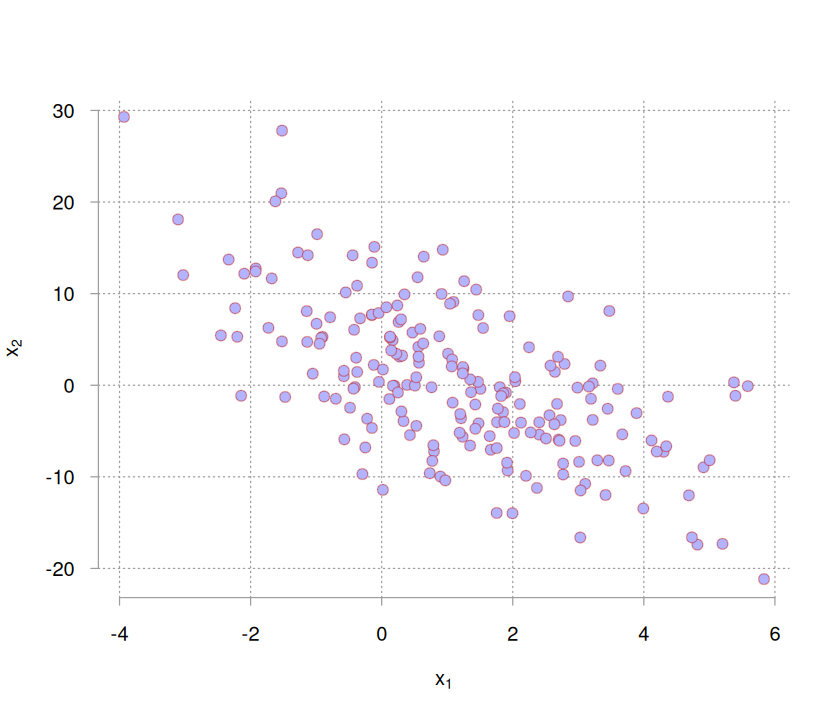

In [26]:
options(repr.plot.width = 7, repr.plot.height = 6)
rho <- -0.6
N <- 200
sigma_1 <- 2
sigma_2 <- 8
# por ecuación 11
Sigma <- matrix( # matriz de covarianza
  c(
    sigma_1^2, rho * sigma_1 * sigma_2,
    rho * sigma_1 * sigma_2, sigma_2^2
  ),
  ncol = 2
)
mu1 <- 1
mu2 <- 1
mu_vec <- c(mu1, mu2)
L <- t(chol(Sigma))
L # matriz triangular
set.seed(123)
u <- matrix(rnorm(2 * N), 2, N) # 2 filas, N/2 columnas
# sumar element-wise, mu1 + col_1, mu2 + col_2
x <- (mu_vec + t(L %*% u))

scatter_plot(
  x[, 1], x[, 2],
  # dos formas diferentes de anotaciones matemáticas
  xlab = parse(text = "x[1]"), ylab = expression(x[2]),
  color = red_light, fill = blue_light
)

Ahora vamos a evaluar el efecto de $\rho$ sobre la distribución bivariada. Primero, recordar de la ecuación (9) 

$$
  d_M^2 = (\mathbf{x}-\boldsymbol{\mu})^\top \boldsymbol{\Sigma}^{-1}(\mathbf{x}-\boldsymbol{\mu}) \tag{9}
$$

Es la distancia cuadrada de Mahalanobis, que mide la distancia de un punto $p=(x_1, x_2)$ al centroide $\boldsymbol{\mu} = \left[\mu_1, \mu_2 \right] $, considerando la correlación, a diferencia de la distancia euclideana. Notar que, dado que depende de $\boldsymbol{\Sigma}$, está influenciada por la correlación.

Vamos a notar algunas cosas sobre $d_M^2$:

1. Todos los valores de $\mathbf{x}$ cuyo valor de $d_M^2$ son iguales tienen la misma densidad $f(\mathbf{x})$.
2. A medida que $d_M^2$ incrementa, $f(\mathbf{x})$ *decrece*.
3. A medida que $d_M^2$ incrementa la distancia entre $\mathbf{x}$ y $\boldsymbol{\mu}$ incrementa, esto equivale a que un valor se mueva hacia las colas de una distribución.
4. La variable $d_M^2$ tiene una distribución $\chi^2$ con $p$ grados de libertad, en donde $p$ es la dimensión de $\mathbf{x}$. Se pueden obtener valores de $d_M$ obteniendo el valor en $x$ de la distribución acumulada de $\chi^2$ que corresponde a un cuantil (una proporción del área bajo la curva). Abajo se ilustra la forma de una distribución de $\chi^2$ con 3 grados de libertad.
5. El cuantil en $\chi^2(1-\alpha,df=p)$ corresponde al cuadrado del radio de un (hiper)-elipse, en donde $1-\alpha$ es un nivel de significancia (una densidad de probabilidad).

Los puntos 2 y 3 permiten obtener una aplicación interesante: dado que los puntos se alejan del centro de la distribución, un punto que tenga una distancia de Mahalanobis probablemente no pertenece a la distribución, es decir es un outlier.

Los puntos 4 y 5 permite construir elipses de confianza (análogos a los intervalos de confianza para 2D), lo que facilita la visualización.

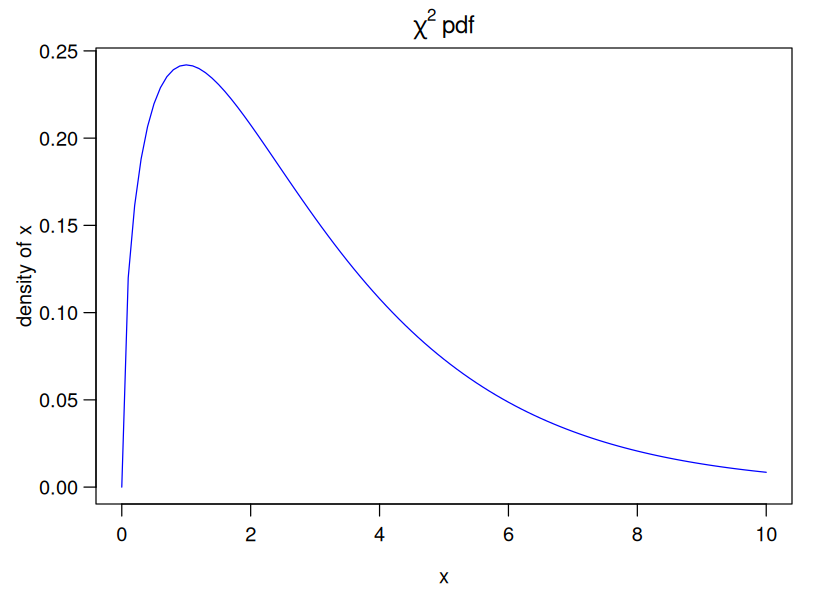

In [3]:
options(repr.plot.width=7, repr.plot.height=5)
par(
  mgp = c(2.5, 0.75, 0),
  mar = c(4, 4, 2, 2),
  las = 1
)
curve(
  dchisq(x, df = 3),
  from = 0, to = 10,
  ylab = 'density of x',
  xlab = 'x',
  main = expression(chi^2~pdf),
  col = 'blue'
)

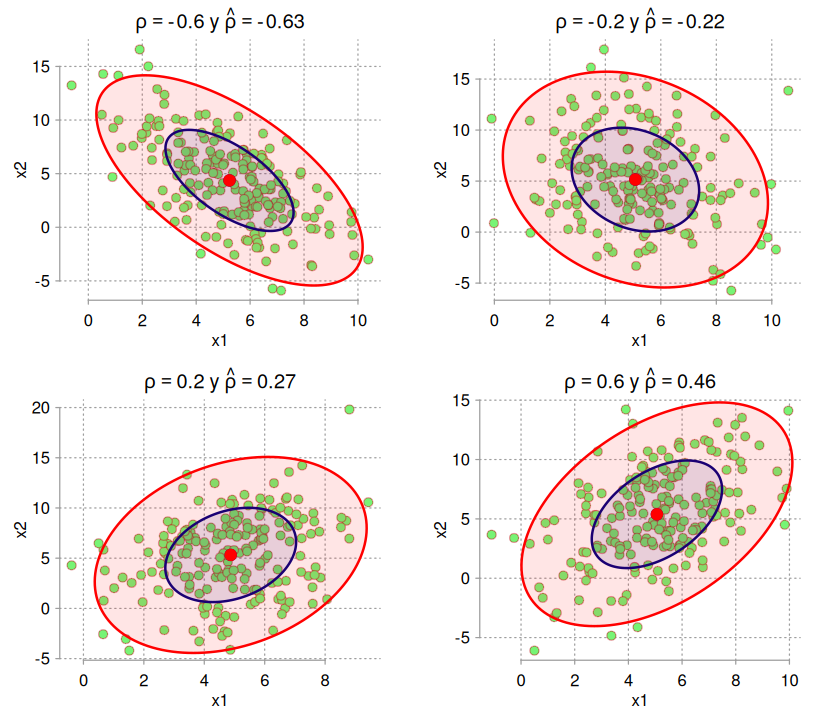

In [28]:
rho_vec <- c(-0.6, -0.2, 0.2, 0.6)
sigma_1 <- 2#
sigma_2 <- 4
sigma_vec <- c(sigma_1, sigma_2)
mu_vec <- c(5, 5)

par(
  mfrow = c(2, 2),
  mgp = c(1.5, 0.5, 0),
  mar = c(3, 3, 2, 2)
)

for (rho in rho_vec) {
  x <- sim_bivariate(rho, sigma_vec, mu_vec, N = 200, seed = 145)
  
  scatter_plot(
    x[, 1], x[, 2],
    xlab = "x1",
    ylab = "x2",
    fill = green_light,
    color = red_light,
    main = parse(text = sprintf("rho == %s~y~hat(rho)==%s", rho, cor(x[, 1], x[, 2]) |> round(2)))
  )

  rad <- qchisq(p = c(0.5, .95), df = ncol(x))
  rad <- sqrt(rad)
  plot_ellipse(x, rad, colores = c("navy", "red"))
}


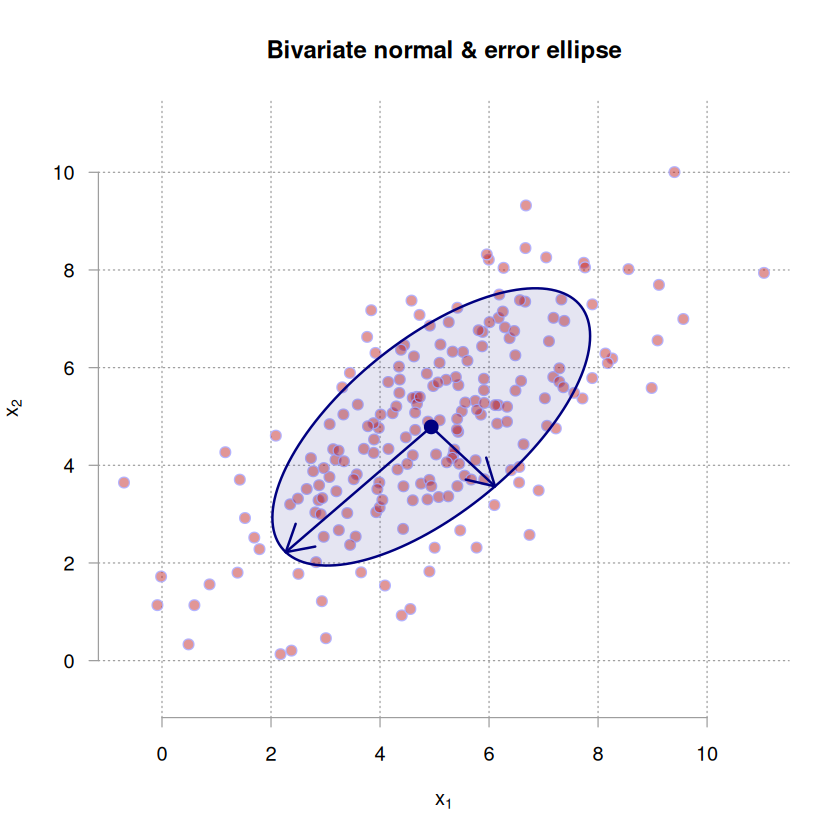

In [29]:
# Ahora veremos cómo se relacionan los eigenvectores y eigenvalores
# con los ejes del elipse
options(repr.plot.width = 7, repr.plot.height = 7)
sigma_1 <- 2
sigma_2 <- 2
mu_vec <- c(5, 5)
x <- sim_bivariate(0.6, c(sigma_1, sigma_2), mu_vec, 200, seed = 123)
scatter_plot(
  x = x[ ,1], y = x[ ,2],
  color = blue_light, fill = red_light,
  xlim = range(x), ylim = range(x),
  main = "Bivariate normal & error ellipse",
  xlab = expression(x[1]), ylab = expression(x[2])
)

rad <- qchisq(p = .95, df = ncol(x))
rad <- sqrt(rad)
# radio a mu + sd, approx 
rad2 <- qchisq(0.6826895, 2) |> sqrt()
plot_ellipse(x, rad2, colores = c('navy', 'red'))
covX <- cov(x)
eigVal <- eigen(covX)$values
eigVec <- eigen(covX)$vectors
# media empírica (vector)
emp_mean <- colMeans(x)
# obtener el eigenvector correspondiente al eigenvalor más largo
max_eigen_val_index <- which.max(eigVal)
max_eigVal <- eigVal[max_eigen_val_index]
max_eigVec <- eigVec[, max_eigen_val_index]
# correspondiente al eigenvalor más corto
min_eigVal <- eigVal[-max_eigen_val_index]
min_eigVec <- eigVec[ ,-max_eigen_val_index]
# dibujar el eje mayor
arrows(
  # x0, y0
  emp_mean[1], emp_mean[2],
  # x1
  emp_mean[1] + sqrt(max_eigVal) * max_eigVec[1] * rad2, 
  # y1
  emp_mean[2] + sqrt(max_eigVal) * max_eigVec[2] * rad2,
  col = 'navy',
  lwd = 2
)
# dibujar el eje menor
arrows(
  emp_mean[1], emp_mean[2],
  emp_mean[1] + sqrt(min_eigVal) * min_eigVec[1] * rad2,
  emp_mean[2] + sqrt(min_eigVal) * min_eigVec[2] * rad2,
  col = "navy",
  lwd = 2
)

Notar que los eigenvectores son ortogonales entre sí (su producto punto es 0, `eigVec[,1] %*% eigVec[,2]`). Luego en el tema de PCA veremos que el eigenvector correspondiente al eigenvalor más largo corresponde al componente principal 1, que es el componente en una matriz en donde existe mayor variación. 

**Ejemplo**

Suponer una distribución bivariada normal $X\sim \mathcal{N}(\bm\mu, \Sigma)$ con centroide

$$
  \boldsymbol{\mu} = \begin{bmatrix}
  3.1 \\ 3.0
  \end{bmatrix}
$$

Y matriz de covarianzas

$$
  \Sigma = \begin{bmatrix}
    0.7163324 & 0.6876791\\
    0.6876791 & 1.0601719
  \end{bmatrix}
$$

Cuya inversa $\Sigma^{-1}$ (ver los Preliminares de esta Notebook)

$$
  \Sigma^{-1}=\begin{bmatrix}
    3.7 & -2.4\\
   -2.4 & 2.5
  \end{bmatrix}
$$

1. Encontrar la distancia euclideana de los puntos $p_1 = (5, 5), p_2 = (5, 2)$ con respecto a $\bm\mu$.
2. Encontrar $d_M$, la distancia cuadrática de Malahanobis.
3. Verificar si $p_1, p_2$ son outliers de acuerdo a $d_M$ y su distribución, al $\alpha = 0.05$ de confianza.

*Solución*

1. Con respecto a $\bm\mu$, tenemos para $p_1$

$$
  d_E = \sqrt{(5-3.1)^2 + (5-3)^2} = 2.7586
$$

y para $p_2$

$$
  d_E = \sqrt{(5-3.1)^2 + (2-3)^2} = 2.147
$$

Ambos puntos están muy próximos al centroide.

2. Para la distancia de Malahanobis, usamos su definición (9)

$$
  d_M = \sqrt{(\mathbf{x}-\boldsymbol{\mu})^\top \boldsymbol{\Sigma}^{-1}(\mathbf{x}-\boldsymbol{\mu})}
$$

Para $p_1$ da

$$
  d_M = \sqrt{
    \begin{bmatrix}
    5-3.1\\
    5-3
    \end{bmatrix}^\top
    \begin{bmatrix}
    3.7 & -2.4\\
   -2.4 & 2.5
    \end{bmatrix}
    \begin{bmatrix}
    5-3.1\\
    5-3
    \end{bmatrix}
  } = \sqrt{
    \begin{bmatrix}
    1.9 & 2
    \end{bmatrix}
    \begin{bmatrix}
    3.7 & -2.4\\
   -2.4 & 2.5
    \end{bmatrix}
    \begin{bmatrix}
    1.9 \\ 2
    \end{bmatrix}
  } = \sqrt{5.117} = 2.26
$$

Para $p_2$

$$
  d_M = \sqrt{
    \begin{bmatrix}
    5-3.1\\
    2-3
    \end{bmatrix}^\top
    \begin{bmatrix}
    3.7 & -2.4\\
   -2.4 & 2.5
    \end{bmatrix}
    \begin{bmatrix}
    5-3.1\\
    2-3
    \end{bmatrix}
  } = \sqrt{
    \begin{bmatrix}
    1.9 & -1
    \end{bmatrix}
    \begin{bmatrix}
    3.7 & -2.4\\
   -2.4 & 2.5
    \end{bmatrix}
    \begin{bmatrix}
    1.9 \\ -1
    \end{bmatrix}
  } = \sqrt{24.977} = 4.9976
$$

In [30]:
# En R lo anterior sería
# matriz inversa
Sinv <- matrix(c(3.7, -2.4, -2.4, 2.5), ncol = 2, byrow = TRUE)
# vector centroide
mu <- c(3.1, 3)
# distancia euclideana p1
p1 <- as.matrix(c(5, 5))
norm(p1-mu, type = '2')
p2 <- as.matrix(c(5, 2))
norm(p2 - mu, type = "2")
# d de Malahanobis de p1; %*% es el producto punto, t(x) es la traspuesta de x
sqrt(t(p1-mu) %*% Sinv %*% (p1-mu))
# d de Malahanobis de p2
sqrt(t(p2-mu) %*% Sinv %*% (p2-mu))

[1] 2.758623

[1] 2.147091

2.262079


4.997699


Verificamos ahora si $p_1, p_2$ son outliers considerando que la distancia de Mahalanobis al cuadrado tiene distribución $\chi^2$ con $1-\alpha$ nivel de significancia y $\dim(X)=2$ grados de libertad. En R  `qchisq(1-alfa, 2)` nos da el valor de $d_M^2$ al $1-\alpha$ de confianza, por lo que si le sacamos la raíz cuadrada obtendríamos el valor $d_M$ *teórico* con el que sería igual, o por encima del cual, nuestro punto $p_i$ podría ser un outlier.

In [31]:
d_teorico_cuadratico <- qchisq(1 - 0.05, 2)
sqrt(d_teorico_cuadratico)

[1] 2.447747

Vemos que $d_M$ de $p_1$ es menor a este valor, pero $d_M$ de $p_2$ (4.99) no lo es. Por lo tanto, al $1-\alpha$ de confianza, concluimos que $p_2$ es un outlier.

#### Gráficos marginales usando 

Los gráficos de histogramas marginales al gráfico de dispersión pueden aportar información adicional que no es del todo visible con el mero gráfico de dispersión. Por ejemplo, la existencia de outliers, la normalidad de las distribuciones marginales, etc.

1. Opción `{ggplot}` y `{ggExtra}`.
2. Opción `{base}` usando la función `scatter_marginal()` personalizada del script `utilities`.


##### Opción 1

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead.
ℹ The deprecated feature was likely used in the ggExtra package.
  Please report the issue at <https://github.com/daattali/ggExtra/issues>.”


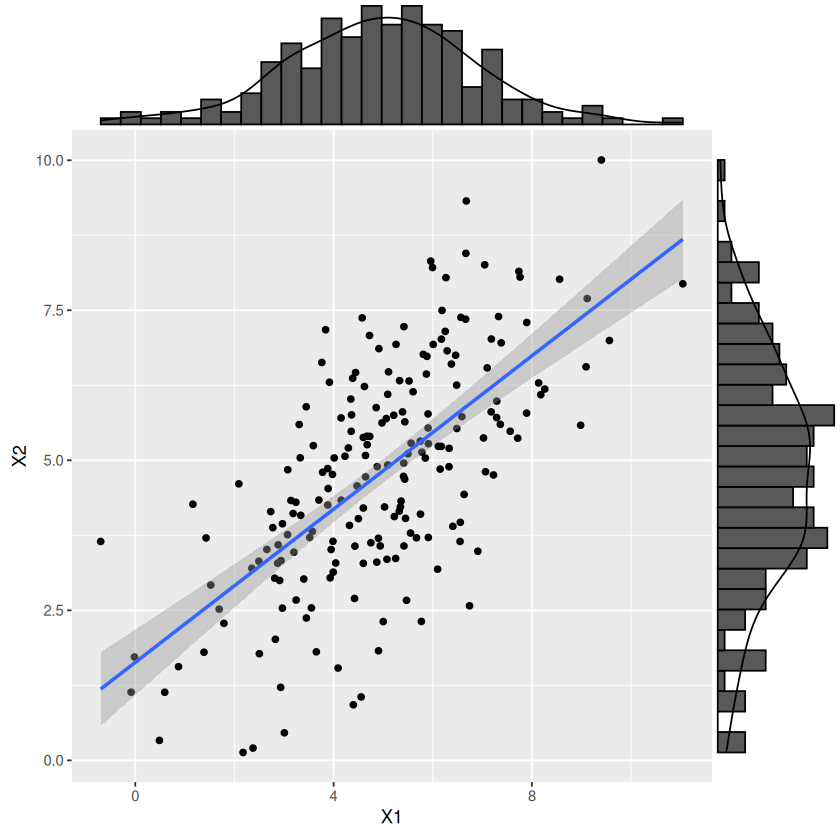

In [32]:
library(tidyverse)
library(ggExtra)

colnames(x) <- c("X1", "X2")

p_scatter <- ggplot(
  x |> as.data.frame(),
  aes(x = X1, y = X2)
) +
  geom_point() +
  geom_smooth(method = "lm")

ggMarginal(p_scatter, type = "densigram")


##### Opción 2

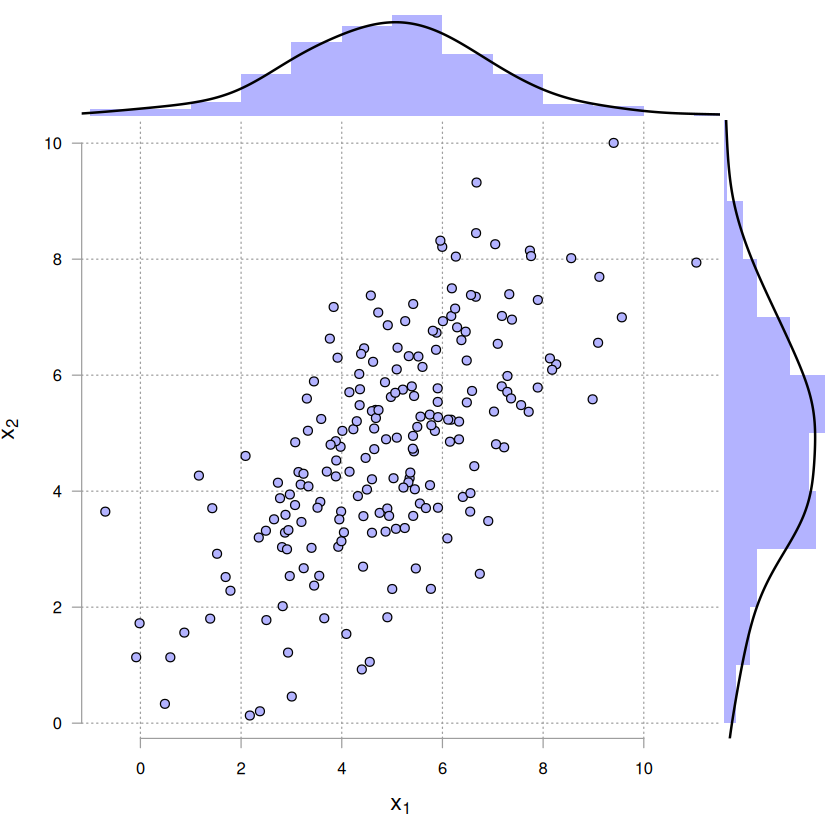

In [34]:
# revisar el código del script utilities.r
scatter_marginal(
  x = x[, 1], y = x[, 2],
  fill = blue_light, color = 1,
  xlab = expression(x[1]), 
  ylab = expression(x[2]),
  cex.lab = 1.4
)